# Cargamos datos y librerías

In [30]:
# Load necessary packages
library(rstan)
library(coda)
library(R2jags)
library(methods)

# set the working directory

setwd("/home/rstudio/guiaExamen")

#--- Funciones utiles ---
prob<-function(x){
  out<-min(length(x[x>0])/length(x),length(x[x<0])/length(x))
  out
}



# Source

In [42]:
source("/home/rstudio/tarea2RegAvanz/claseNietor6.R")

# Modelos simples

FALTA PONER EJEMPLO1,2 


# Modelos lineales generalizados

## Modelo 1 Normal 

Componente aleatoria

$y_{i}|(\mu_{i},\tau) \sim \text{Normal}(\mu_{i}, \tau )$

Componente sistemática

$\eta_{i}=\beta_{1}+\beta_{2}x_{i}$

Liga

$\eta_{i}=\mu_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

$\tau \sim \text{Gamma}(0.001,0.001)$

En este modelo hacemos igualmente predicción de $y_{f}$

### Cargamos datos y params iniciales


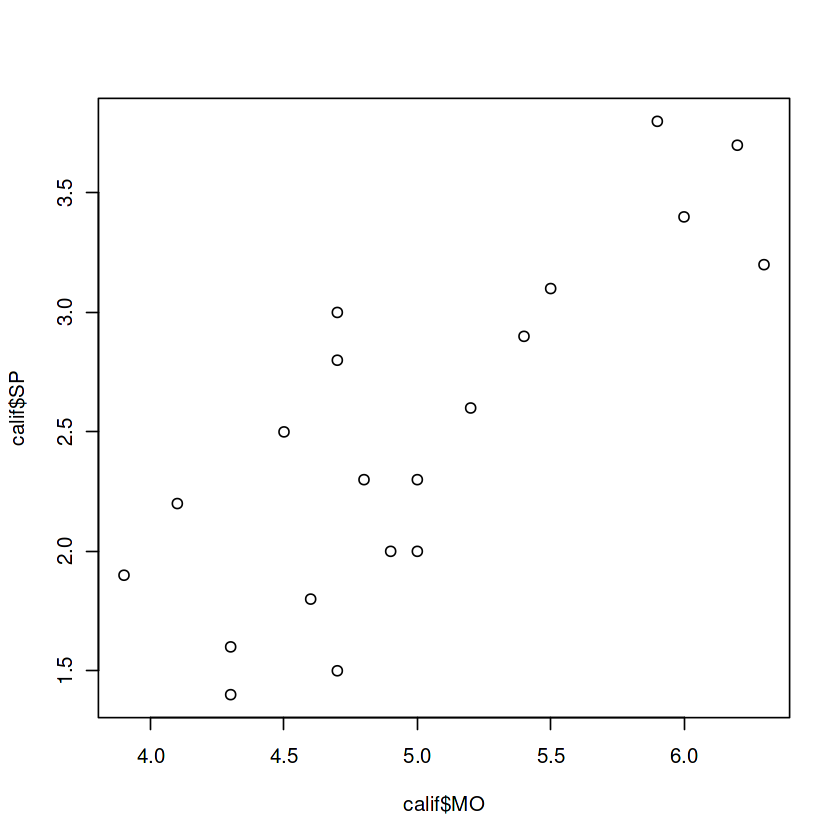

In [11]:
#--- Ejemplo 3 ---
#-Reading data-
calif<-read.table("http://gente.itam.mx/lnieto/index_archivos/calificaciones.txt",header=TRUE)
n<-nrow(calif)
plot(calif$MO,calif$SP)

#-Defining data-
data<-list("n"=n,"y"=calif$SP,"x"=calif$MO)

#-Defining inits-
inits<-function(){list(beta=rep(0,2),tau=1,yf=rep(0,n))} #parte 1
inits2<-function(){list(beta=rep(0,6),tau=1,yf=rep(0,n))} #parte 2

#-Selecting parameters to monitor-
parameters<-c("beta","tau","yf")

In [12]:
## #corremos código


modelCode <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dnorm(mu[i],tau)
	mu[i]<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
tau ~ dgamma(0.001,0.001)
#Prediction
for (i in 1:n) { yf[i] ~ dnorm(mu[i],tau) }
}'

ej.sim <- jagsModel$new(data, inits, parameters, modelCode,n.thin=1, n.iter=10000, n.burnin=1000)

ej.sim$runJagsModel()

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 20
   Unobserved stochastic nodes: 23
   Total graph size: 98

Initializing model



### Verificamos convergencia

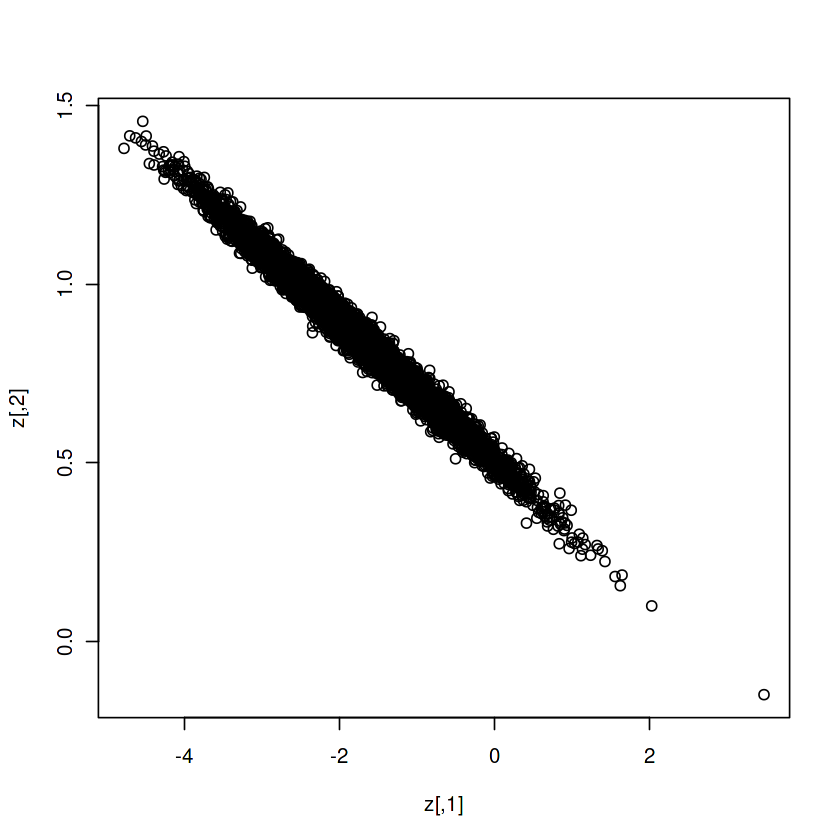

               mean        sd       2.5%        25%        50%       75%
beta[1]  -1.6992078 0.7681589 -3.2151820 -2.1946987 -1.7055047 -1.194093
beta[2]   0.8398299 0.1519696  0.5387278  0.7402572  0.8417725  0.938813
deviance 24.5863916 2.6407485 21.5846846 22.6743030 23.8981418 25.766292
tau       5.2774470 1.7553124  2.3950740  4.0050889  5.0742041  6.313146
yf[1]     2.9208820 0.4792213  1.9785361  2.6111986  2.9200971  3.228279
yf[2]     2.3332848 0.4723816  1.4052881  2.0218538  2.3300883  2.643485
yf[3]     2.2523381 0.4775051  1.3102803  1.9385934  2.2558083  2.562645
yf[4]     1.5746021 0.5001982  0.6007036  1.2481068  1.5704651  1.898620
yf[5]     2.0819246 0.4734726  1.1500714  1.7743587  2.0814732  2.391360
yf[6]     3.5104435 0.5063116  2.5101306  3.1843658  3.5111551  3.839699
yf[7]     3.3370939 0.4953467  2.3451051  3.0178531  3.3400358  3.660563
yf[8]     2.6698702 0.4758958  1.7265703  2.3624040  2.6686226  2.975672
yf[9]     2.2523636 0.4775791  1.3066510  1.9441297

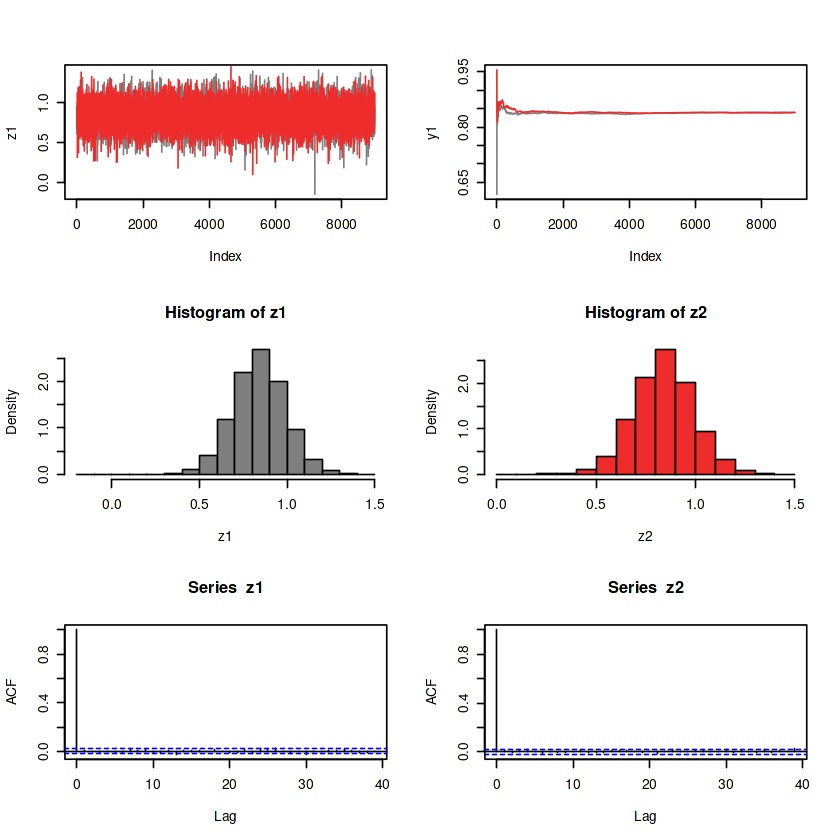

In [15]:
ej.sim$viewSpace()

ej.sim$graphConvergence(parama=2)

ej.sim$summaryModel()

ej.sim$dicModelfunc()

### Variación Normal polinomial

Componente sistemática

$\eta_{i}=beta[1]+beta[2]*x[i]+beta[3]*pow(x[i],2)+beta[4]*pow(x[i],3)+beta[5]*pow(x[i],4)+beta[6]*pow(x[i],5)$

Priors

$\beta_{j} \sim \text{Norm}(0,0.1)$

$\tau \sim \text{Gamma}(0.1,0.1)$



In [28]:
## #corremos código


modelCode2 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dnorm(mu[i],tau)
	mu[i]<-beta[1]+beta[2]*x[i]+beta[3]*pow(x[i],2)+beta[4]*pow(x[i],3)+beta[5]*pow(x[i],4)+beta[6]*pow(x[i],5)
	}
#Priors 
for (j in 1:6) { beta[j] ~ dnorm(0,0.1) }
tau ~ dgamma(0.1,0.1)
#Prediction
for (i in 1:n) { yf[i] ~ dnorm(mu[i],tau) }
}'

ej2.sim <- jagsModel$new(data, inits2, parameters, modelCode2,n.thin=1, n.iter=10000, n.burnin=1000)

ej2.sim$runJagsModel()

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 20
   Unobserved stochastic nodes: 27
   Total graph size: 234

Initializing model



### Verificamos convergencia


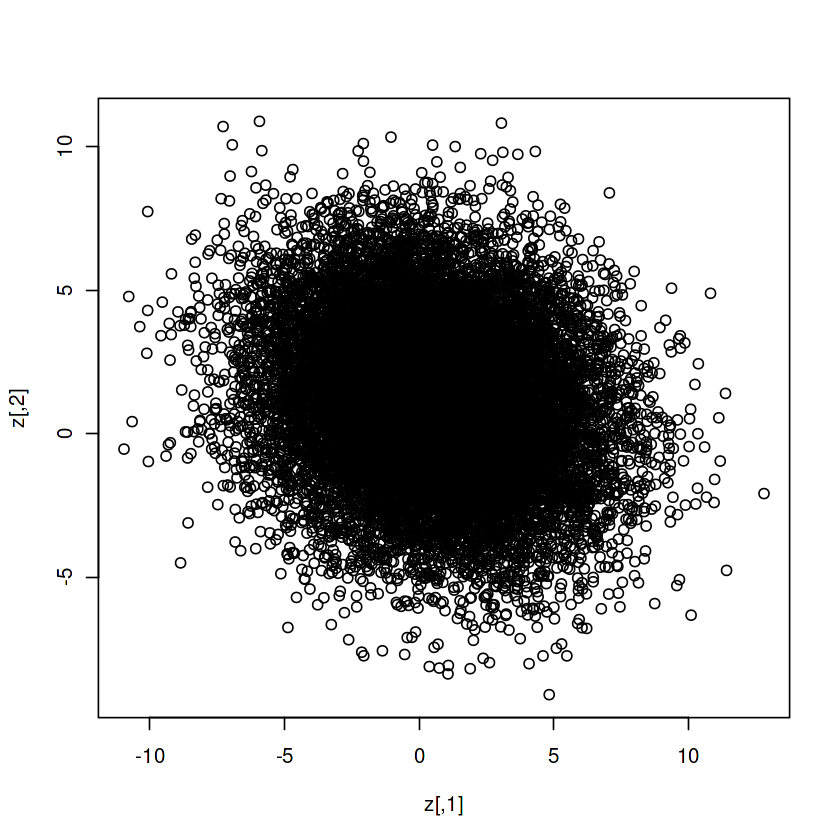

                mean         sd        2.5%         25%         50%
beta[1]   0.54735429 3.05361597 -5.48242393 -1.49166952  0.55777643
beta[2]   1.15020486 2.65996339 -4.05452641 -0.63487065  1.13801595
beta[3]   1.19100183 2.23506607 -3.20143885 -0.30288850  1.20784690
beta[4]  -0.94248003 0.99251675 -2.84028578 -1.62106075 -0.95425508
beta[5]   0.20326169 0.18451698 -0.16701909  0.08034941  0.20708765
beta[6]  -0.01371826 0.01181276 -0.03615621 -0.02168369 -0.01400171
deviance 23.98833725 3.64535810 19.15396677 21.32034260 23.25935684
tau       5.24445830 1.83279325  2.30326352  3.92793892  5.03913610
yf[1]     3.04759721 0.51514199  2.02671470  2.71678440  3.04350530
yf[2]     2.21995034 0.49292192  1.24607427  1.90346040  2.22071055
yf[3]     2.13003670 0.48687197  1.16973172  1.81025411  2.12844031
yf[4]     1.89072743 0.57054014  0.76365246  1.52176941  1.89527822
yf[5]     1.99666140 0.48200777  1.04492628  1.68239312  1.99719809
yf[6]     3.51285325 0.53615584  2.44717650  3.1

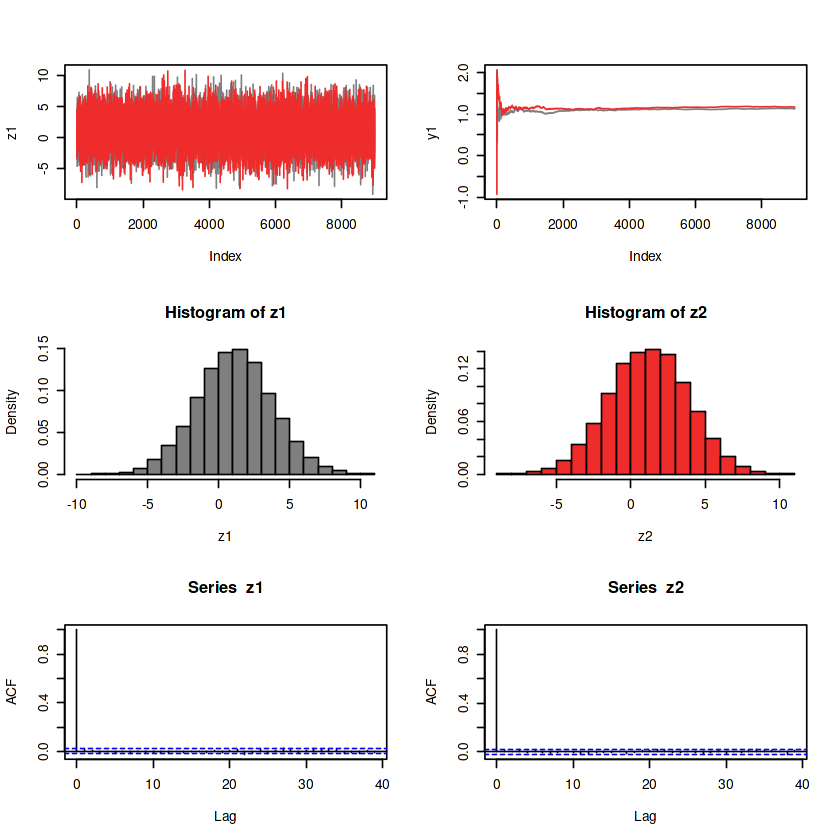

In [29]:
ej2.sim$viewSpace()

ej2.sim$graphConvergence(parama=2)

ej2.sim$summaryModel()

ej2.sim$dicModelfunc()

### Checamos modelo

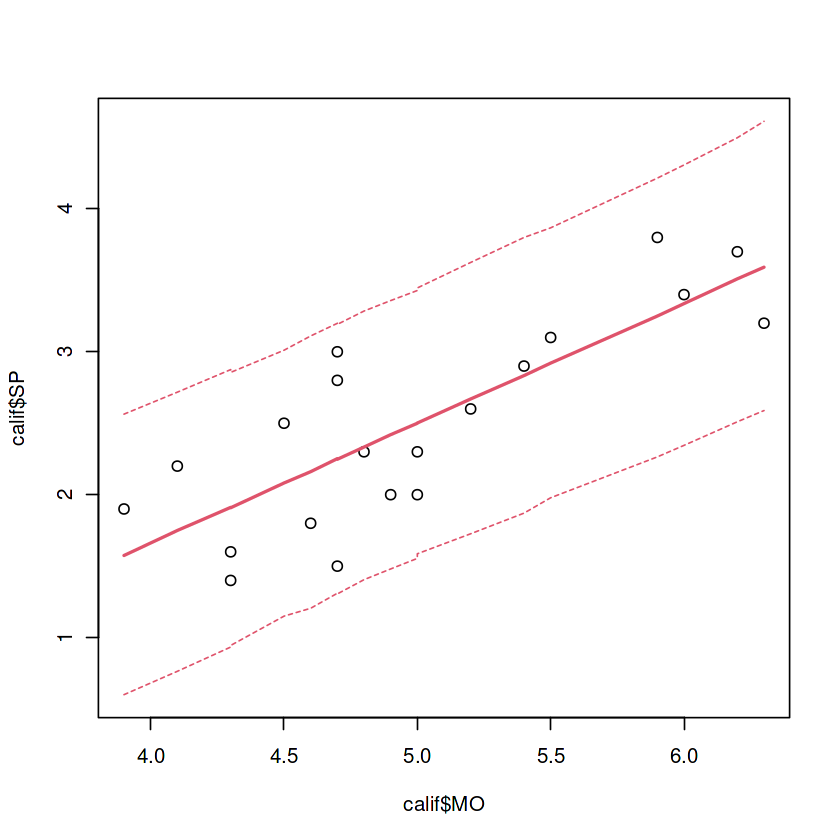

[1] 0.6551111


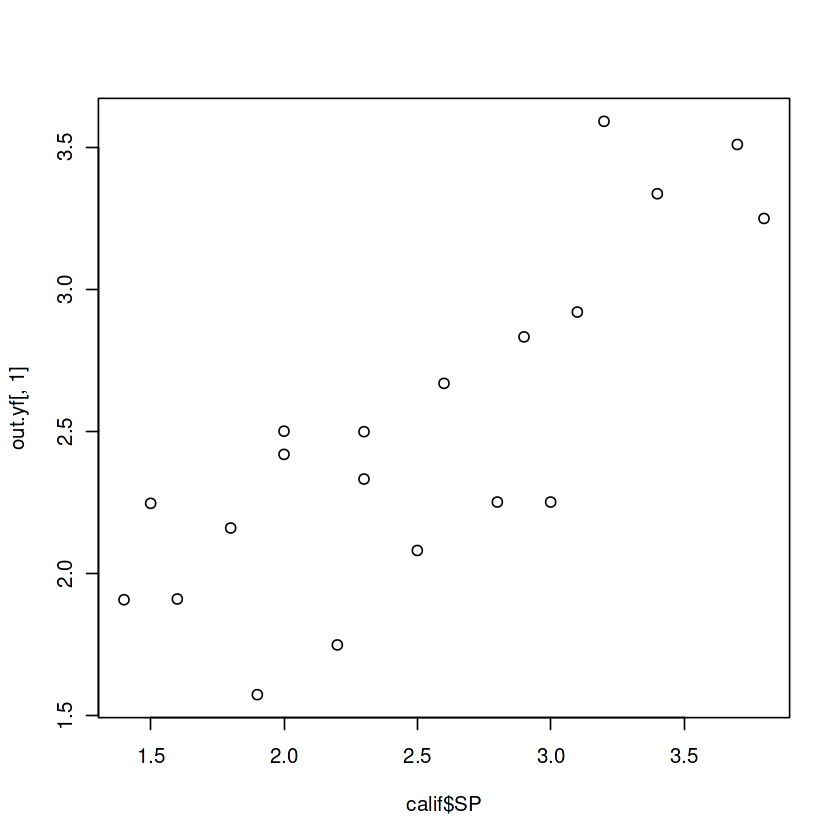

In [33]:
ejercicio3Pred(ej.sim)

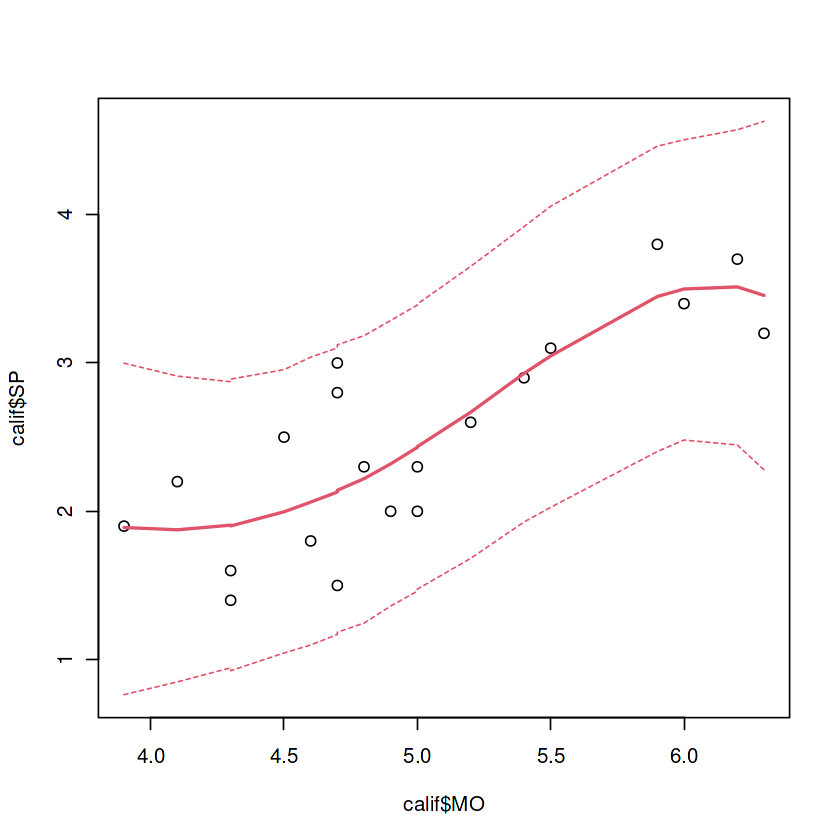

[1] 0.7006376


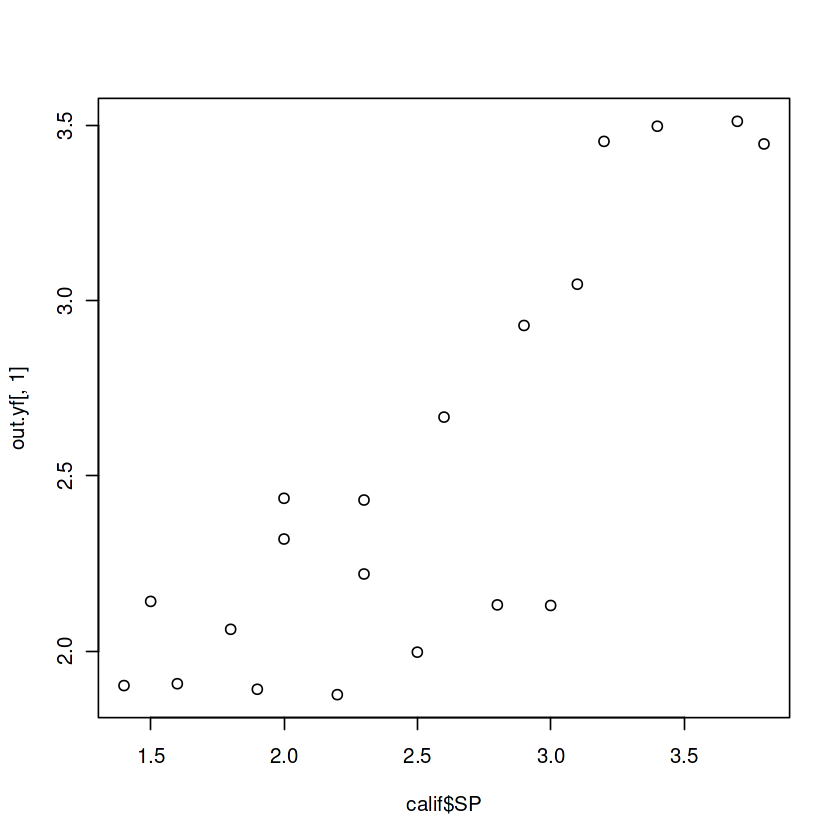

In [34]:
ejercicio3Pred(ej2.sim)

## Modelo 2 Normal 

PREGUNTAR A DIEGO

Componente aleatoria

$y_{i}|(\mu_{i,j},\tau_{i}) \sim \text{Normal}(\mu_{i,j}, \tau_{i} )$

Componente sistemática

$\eta_{i,j}=alpha+beta[i]+gama[dia[i]]+delta[mes[i]]+epsilon[ano[i]]+theta[puente[i]]+nu*x[i,j]$

Liga

$\eta_{i,j}=\mu_{i,j}$

Priors

$alpha ~ dnorm(0,0.001)$

$nu ~ dnorm(0,0.001)$

$for (i in 1:n) {beta[i] ~ dnorm(0,100)}$

$for (i in 1:7) {gama[i] ~ dnorm(0,0.01)}$

$for (i in 1:12) {delta[i] ~ dnorm(0,0.01)}$

$for (i in 1:3) {epsilon[i] ~ dnorm(0,0.01)}$

$for (i in 1:2) {theta[i] ~ dnorm(0,0.01)}$

$for (i in 1:n) {tau[i] ~ dgamma(0.01,0.01)}$

Estimability constraints

$alpha.est = alpha+mean(beta[])+mean(gama[])+mean(delta[])+mean(epsilon[])+mean(theta[])$

$for (i in 1:n) {beta.est[i] = beta[i]-mean(beta[])}$

$for (i in 1:7) {gama.est[i] = gama[i]-mean(gama[])}$

$for (i in 1:12) {delta.est[i] = delta[i]-mean(delta[])}$

$for (i in 1:3) {epsilon.est[i] = epsilon[i]-mean(epsilon[])}$

$for (i in 1:2) {theta.est[i] = theta[i]-mean(theta[])}$



### Entendiendo los datos

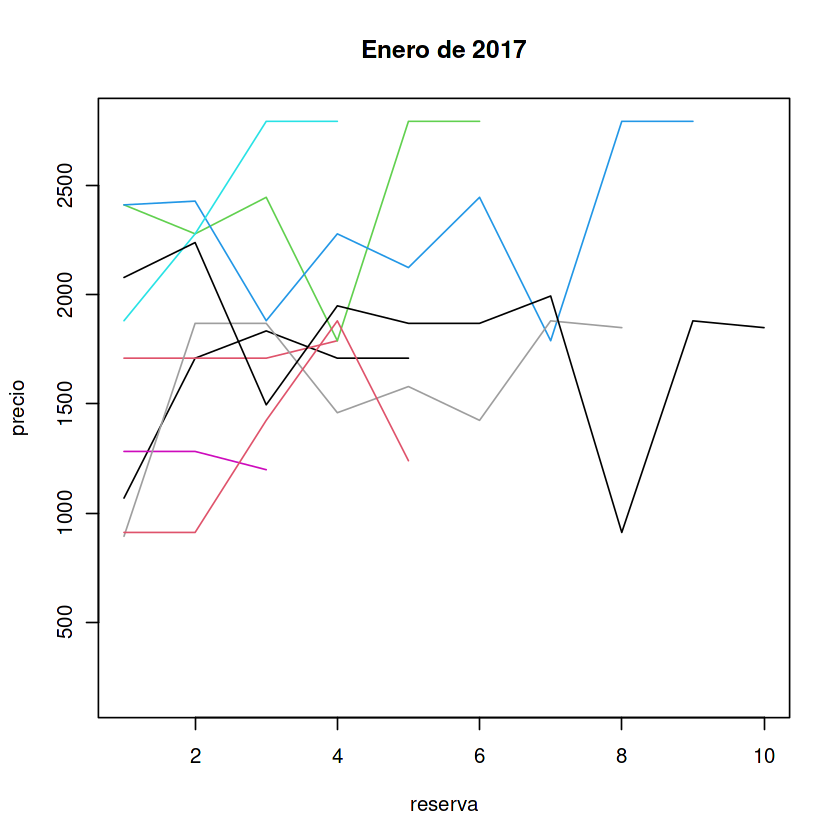

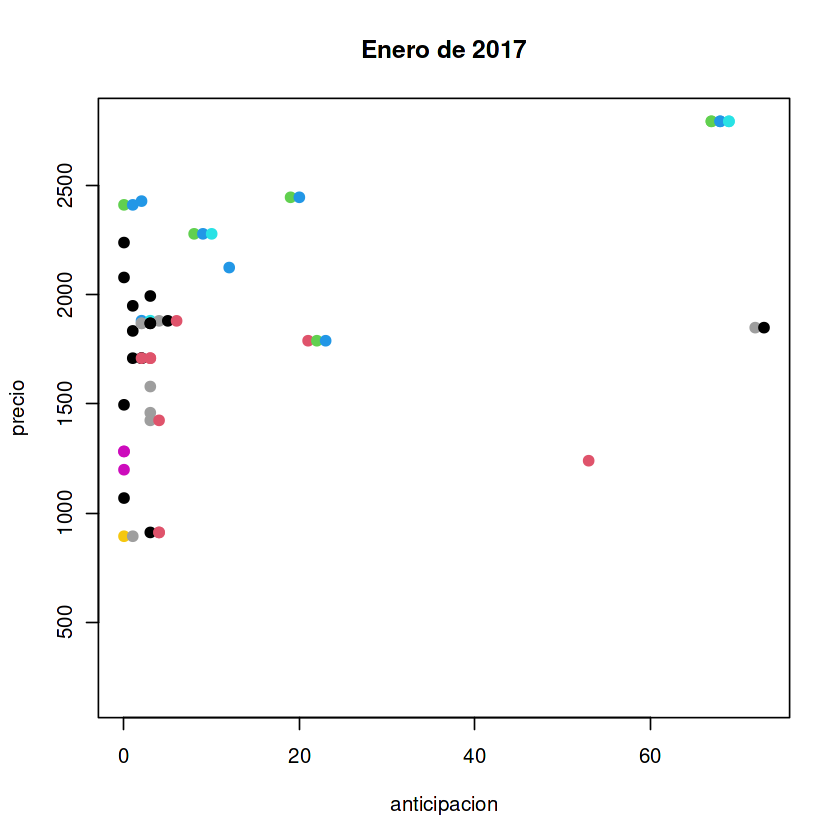

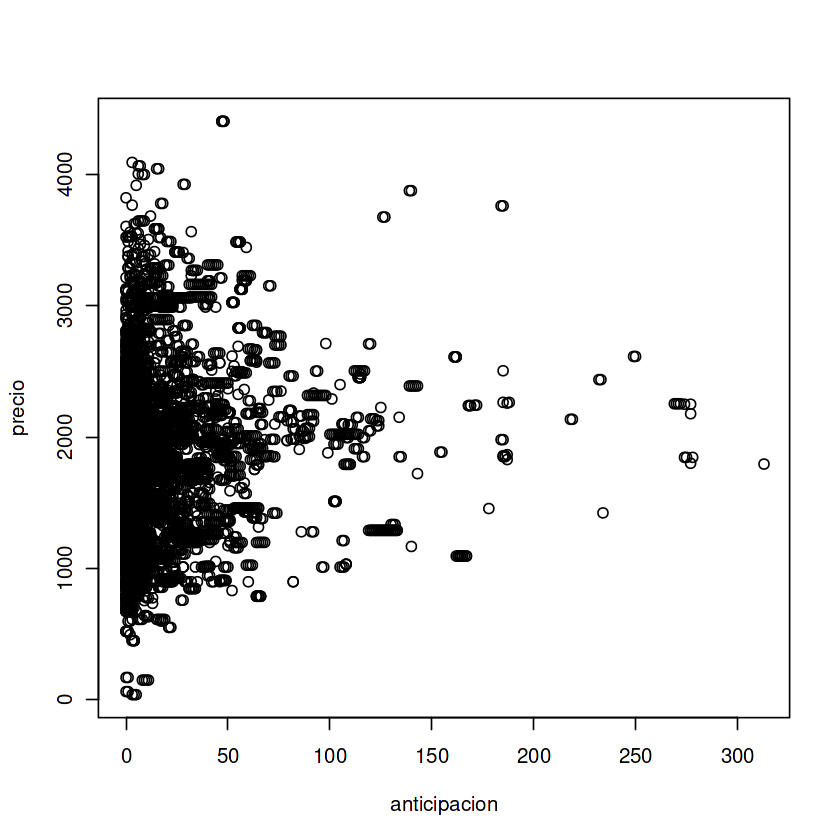

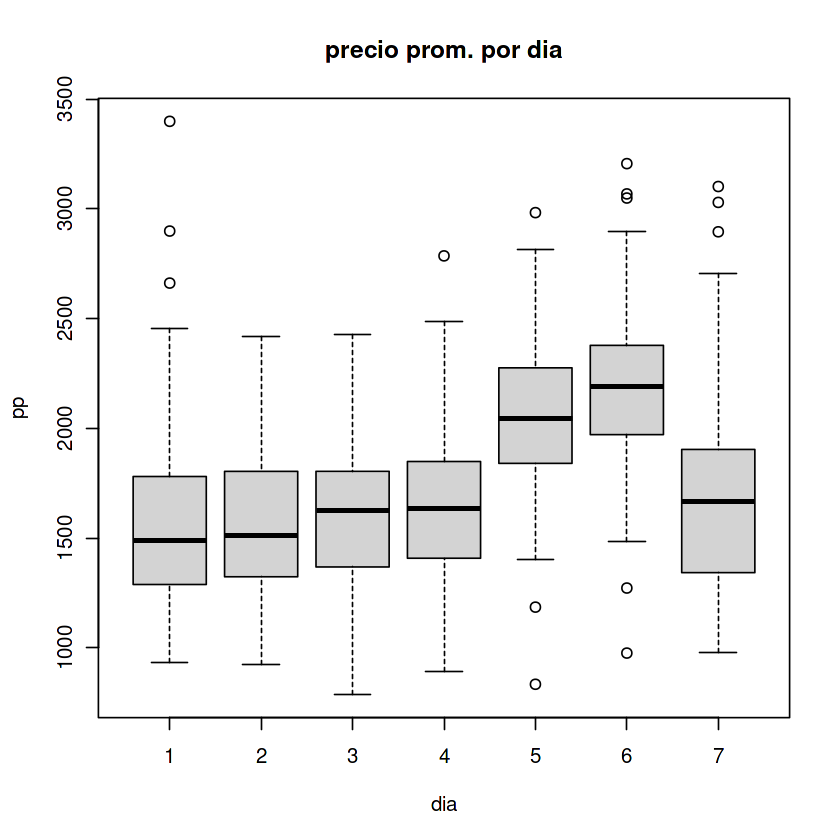

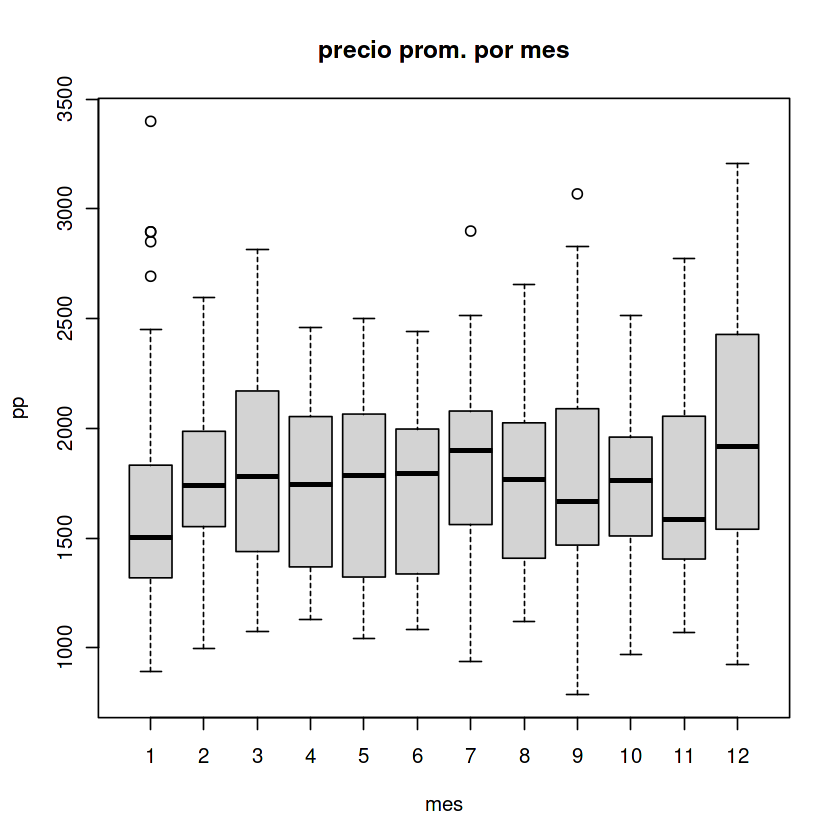

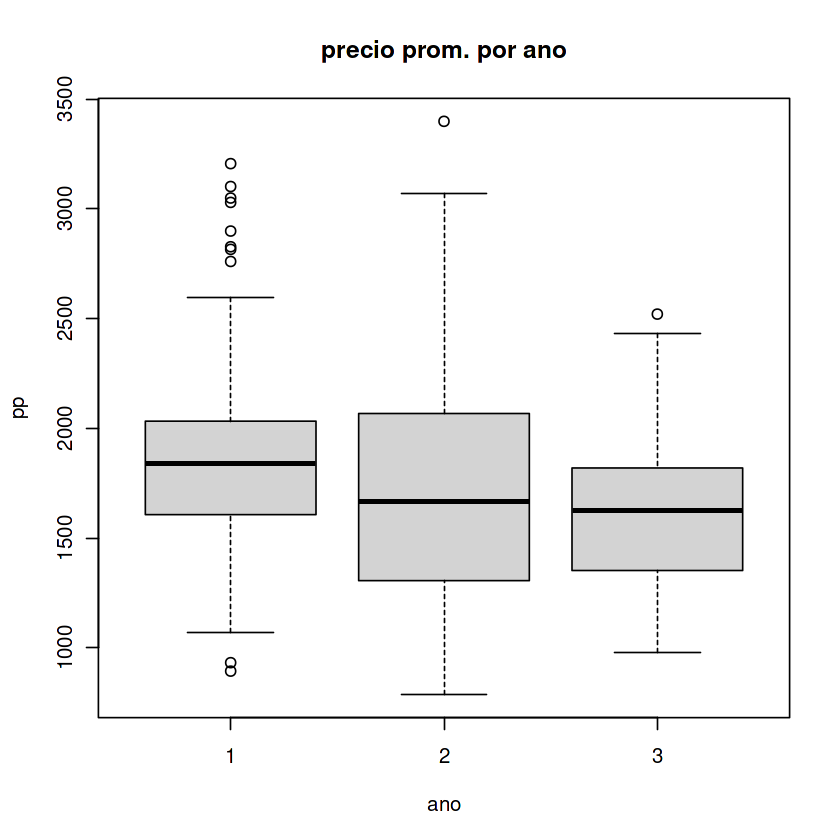

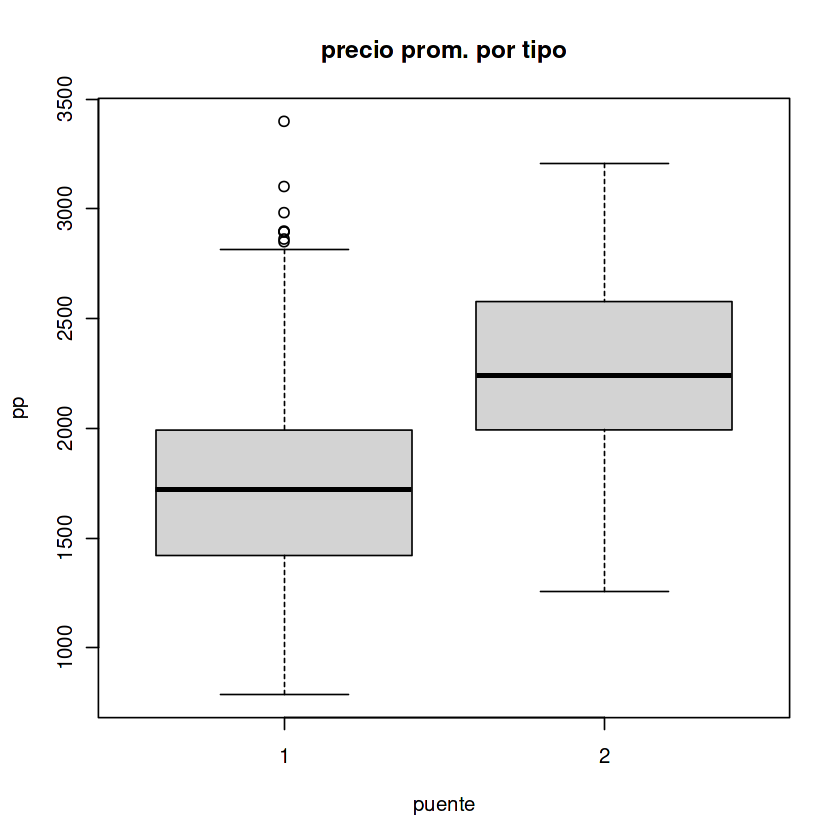

In [36]:
#--- Ejemplo 3.5---
#-Lectura de datos-
precio<-read.csv("http://gente.itam.mx/lnieto/index_archivos/precio.csv")
anticipacion<-read.csv("http://gente.itam.mx/lnieto/index_archivos/anticipacion.csv")
precio[,-1]<-as.matrix(precio[,-1])
anticipacion[,-1]<-as.matrix(anticipacion[,-1])
n<-dim(precio)[1]
m<-precio$num
y<-as.matrix(precio[,2:11])
x<-as.matrix(anticipacion[,2:11])
dia<-precio$dia
mes<-precio$mes
puente<-precio$puente+1
ano<-precio$ano-2016
pp<-m
ap<-m
for (i in 1:n){
  pp[i]<-mean(y[i,1:m[i]])
  ap[i]<-mean(x[i,1:m[i]])
}

#-Graficas-

#series de tiempo de precios
y1<-y[mes==1 & ano==1,]
ymin<-min(y1,na.rm=TRUE)
ymax<-max(y1,na.rm=TRUE)
xmax<-max(m[1:10])
plot(1:m[1],y1[1,1:m[1]],type="l",xlim=c(1,xmax),ylim=c(ymin,ymax),xlab="reserva",ylab="precio")
for (i in 2:10){
  lines(1:m[i],y1[i,1:m[i]],col=i)
}
title("Enero de 2017")
#series de tiempo de precios (anticipacion)
y1<-y[mes==1 & ano==1,]
x1<-x[mes==1 & ano==1,]
ymin<-min(y1,na.rm=TRUE)
ymax<-max(y1,na.rm=TRUE)
xmax<-max(x1[1:10,],na.rm=TRUE)
plot(x1[1,1:m[1]],y1[1,1:m[1]],xlim=c(0,xmax),ylim=c(ymin,ymax),xlab="anticipacion",ylab="precio",pch=19)
for (i in 2:10){
  points(x1[i,1:m[i]],y1[i,1:m[i]],col=i,pch=19)
}
title("Enero de 2017")
#anticipacion vs precio
plot(x,y,xlab="anticipacion",ylab="precio")
#boxplots de pp (precio promedio)
boxplot(pp~dia,main="precio prom. por dia")
boxplot(pp~mes,main="precio prom. por mes")
boxplot(pp~ano,main="precio prom. por ano")
boxplot(pp~puente,main="precio prom. por tipo")

### Cargamos datos

In [40]:
#-Definiendo datos-
data<-list("n"=n,"y"=y/1000,"x"=x,"m"=m,"dia"=dia,"mes"=mes,"puente"=puente,"ano"=ano)

#-Definiendo inits-
inits<-function(){list(alpha=0,nu=0,beta=rep(0,n),gama=rep(0,7),delta=rep(0,12),epsilon=rep(0,3),theta=rep(0,2),tau=rep(1,n))}

#-Seleccionando parametros a monitorear-
parameters<-c("alpha.est","nu","beta.est","gama.est","delta.est","epsilon.est","theta.est","tau")

In [41]:
## #corremos código


modelCode <- 'model
{
#Likelihood
for (i in 1:n) {
for (j in 1:m[i]) {
	y[i,j] ~ dnorm(mu[i,j],tau[i])
	mu[i,j] <- alpha+beta[i]+gama[dia[i]]+delta[mes[i]]+epsilon[ano[i]]+theta[puente[i]]+nu*x[i,j]
	}
	}
#Priors
alpha ~ dnorm(0,0.001)
nu ~ dnorm(0,0.001)
for (i in 1:n) {beta[i] ~ dnorm(0,100)}
for (i in 1:7) {gama[i] ~ dnorm(0,0.01)}
for (i in 1:12) {delta[i] ~ dnorm(0,0.01)}
for (i in 1:3) {epsilon[i] ~ dnorm(0,0.01)}
for (i in 1:2) {theta[i] ~ dnorm(0,0.01)}
for (i in 1:n) {tau[i] ~ dgamma(0.01,0.01)}
#Estimability constraints
alpha.est <- alpha+mean(beta[])+mean(gama[])+mean(delta[])+mean(epsilon[])+mean(theta[])
for (i in 1:n) {beta.est[i] <- beta[i]-mean(beta[])}
for (i in 1:7) {gama.est[i] <- gama[i]-mean(gama[])}
for (i in 1:12) {delta.est[i] <- delta[i]-mean(delta[])}
for (i in 1:3) {epsilon.est[i] <- epsilon[i]-mean(epsilon[])}
for (i in 1:2) {theta.est[i] <- theta[i]-mean(theta[])}
#Predictive
for (i in 1:n) {
for (j in 1:m[i]) {
	yf[i,j] ~ dnorm(mu[i,j],tau[i])
	}
	}
}'

ej.sim <- jagsModel$new(data, inits, parameters, modelCode,n.thin=1, n.iter=1000, n.burnin=100)

ej.sim$runJagsModel()

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5946
   Unobserved stochastic nodes: 7468
   Total graph size: 29421

Initializing model



### Verificamos convergencia

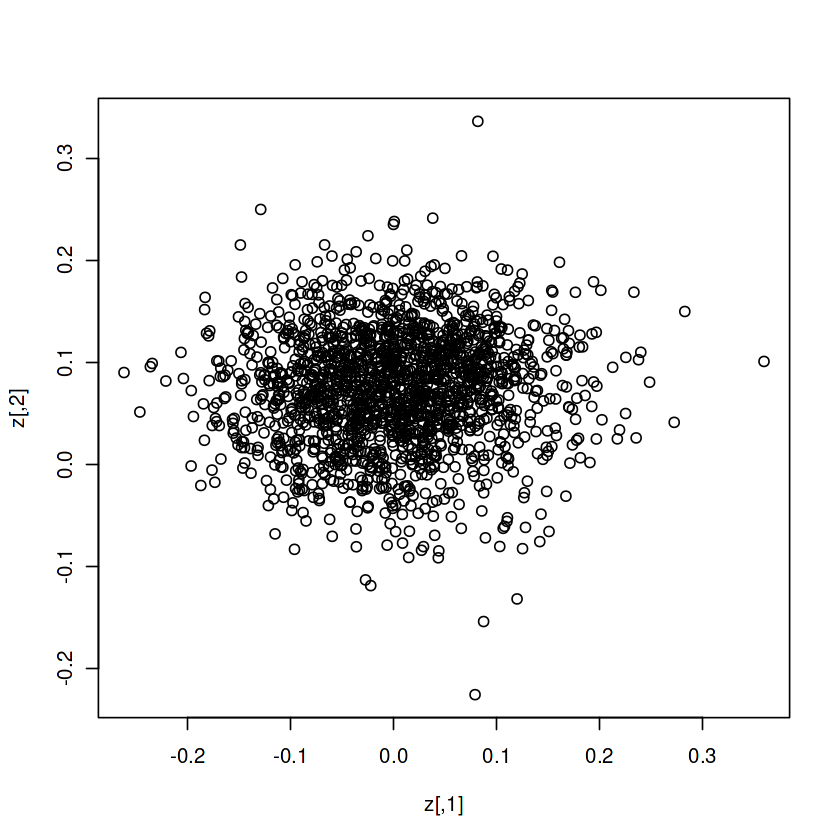

                        mean           sd          2.5%           25%
alpha.est       1.845320e+00 2.090763e-02  1.806365e+00  1.831370e+00
beta.est[1]     6.945324e-04 8.051221e-02 -1.506356e-01 -5.516886e-02
beta.est[2]     7.386606e-02 5.668231e-02 -4.281409e-02  3.885085e-02
beta.est[3]     8.886573e-02 9.388698e-02 -9.589759e-02  2.537308e-02
beta.est[4]     6.901613e-02 7.895188e-02 -9.597063e-02  1.711869e-02
beta.est[5]     4.679109e-02 1.013422e-01 -1.558588e-01 -1.981128e-02
beta.est[6]    -1.211986e-01 1.004671e-01 -2.919138e-01 -1.950793e-01
beta.est[7]    -1.574789e-02 1.005512e-01 -2.150764e-01 -8.288329e-02
beta.est[8]    -1.184957e-01 9.626750e-02 -3.054545e-01 -1.856999e-01
beta.est[9]    -1.118242e-01 8.749823e-02 -2.789788e-01 -1.709628e-01
beta.est[10]   -6.171825e-02 9.627068e-02 -2.435314e-01 -1.283141e-01
beta.est[11]   -6.600891e-02 8.266222e-02 -2.251262e-01 -1.222774e-01
beta.est[12]   -4.254354e-02 8.088639e-02 -1.903662e-01 -9.840774e-02
beta.est[13]   -5.25

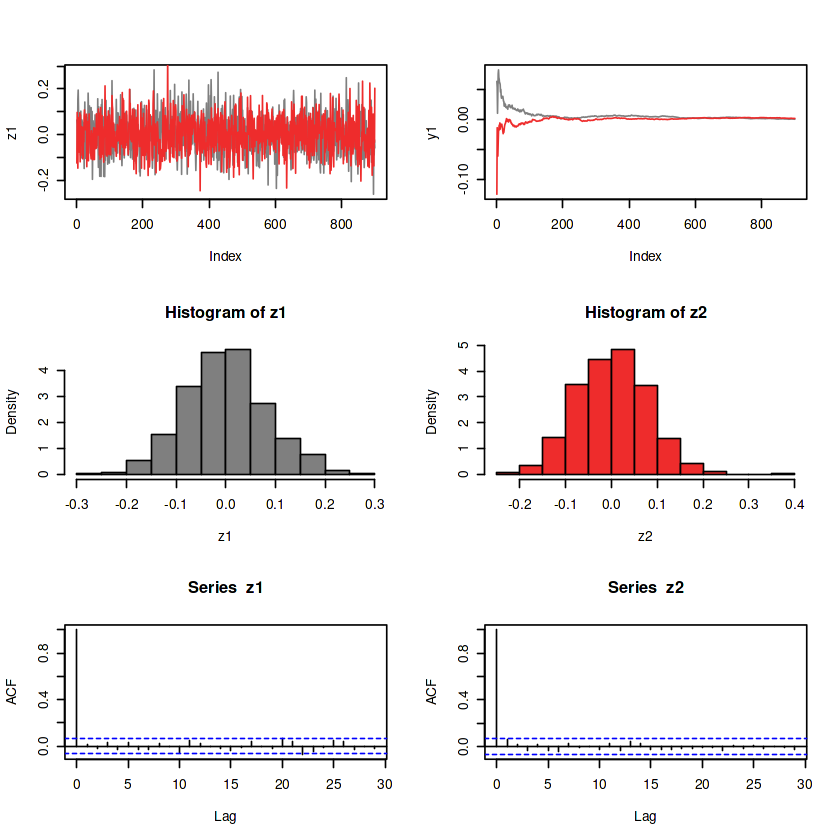

In [44]:
ej.sim$viewSpace()

ej.sim$graphConvergence(parama=2)

ej.sim$summaryModel()

ej.sim$dicModelfunc()

### Checamos modelo

       mean        2.5%       97.5% 
0.002154270 0.001692714 0.002642594 
                       mean          2.5%        97.5%
beta.est[1]    0.0006945324 -0.1506355568  0.167432635
beta.est[2]    0.0738660637 -0.0428140857  0.175612828
beta.est[3]    0.0888657348 -0.0958975854  0.270975471
beta.est[4]    0.0690161296 -0.0959706283  0.215551852
beta.est[5]    0.0467910883 -0.1558588401  0.244748101
beta.est[6]   -0.1211985535 -0.2919138286  0.090843664
beta.est[7]   -0.0157478885 -0.2150764062  0.181191254
beta.est[8]   -0.1184957337 -0.3054544690  0.075169614
beta.est[9]   -0.1118242477 -0.2789787713  0.066280642
beta.est[10]  -0.0617182471 -0.2435313617  0.133016392
beta.est[11]  -0.0660089121 -0.2251261924  0.100759093
beta.est[12]  -0.0425435435 -0.1903661867  0.130912423
beta.est[13]  -0.0525295079 -0.2028770216  0.112553880
beta.est[14]  -0.1362047286 -0.2988856719  0.051517987
beta.est[15]  -0.0680962790 -0.2730536769  0.137959216
beta.est[16]   0.0773208749 -0.1000310457  0.2

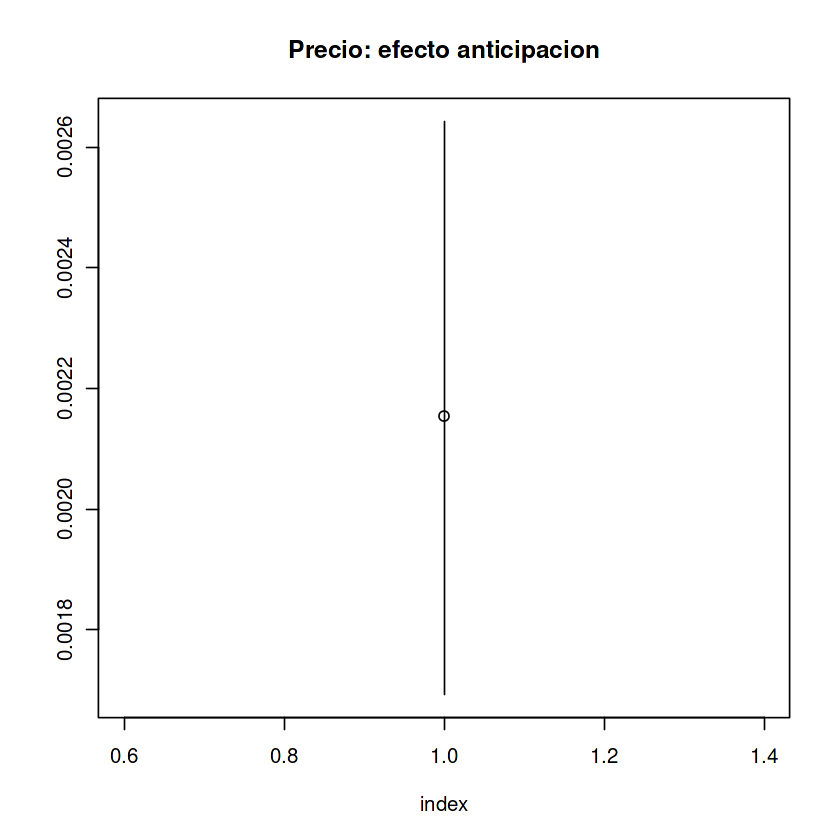

                  mean       2.5%       97.5%
gama.est[1] -0.2152580 -0.2507104 -0.17999594
gama.est[2] -0.1701376 -0.2053558 -0.13577020
gama.est[3] -0.1166205 -0.1520019 -0.08261124
gama.est[4] -0.0947480 -0.1291211 -0.06023032
gama.est[5]  0.3009609  0.2657639  0.33852646
gama.est[6]  0.3977972  0.3634705  0.43519607
gama.est[7] -0.1019940 -0.1421408 -0.06207652


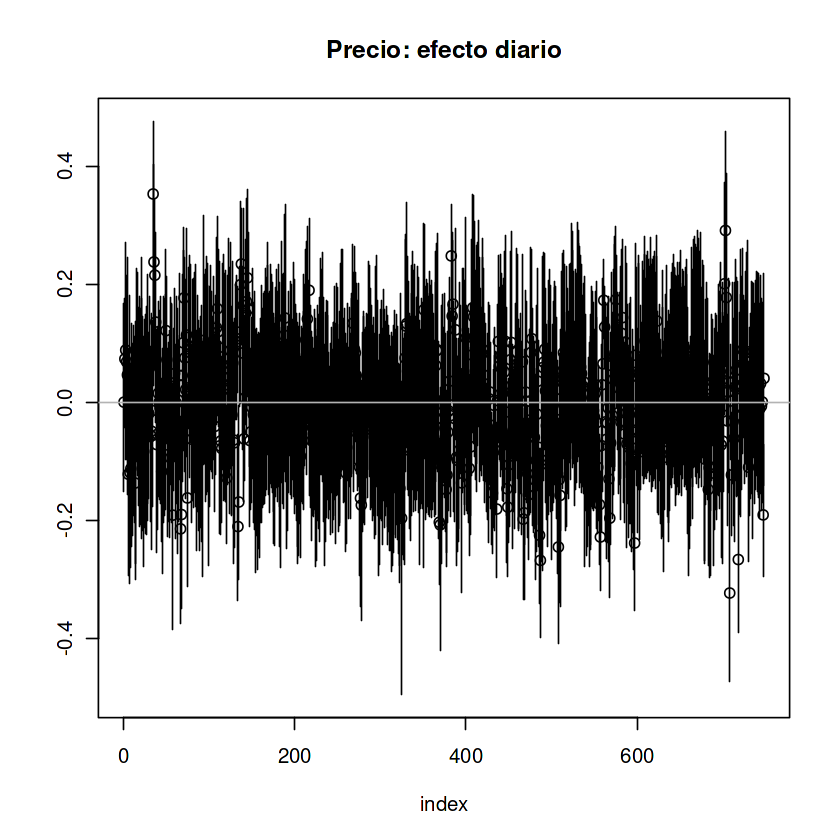

                      mean        2.5%        97.5%
delta.est[1]  -0.053328938 -0.11377982  0.004908679
delta.est[2]   0.051090045  0.00157486  0.099617961
delta.est[3]   0.021316476 -0.02517116  0.069908396
delta.est[4]  -0.064858357 -0.11279809 -0.018240742
delta.est[5]  -0.058700409 -0.10608914 -0.008392302
delta.est[6]   0.018446503 -0.02672138  0.064649651
delta.est[7]   0.083564406  0.02636302  0.142874408
delta.est[8]  -0.009552075 -0.05812208  0.038746361
delta.est[9]   0.065475179  0.01847520  0.111616186
delta.est[10] -0.068683012 -0.11745681 -0.018888937
delta.est[11] -0.089388689 -0.14101683 -0.038842472
delta.est[12]  0.104618871  0.03214574  0.176009418


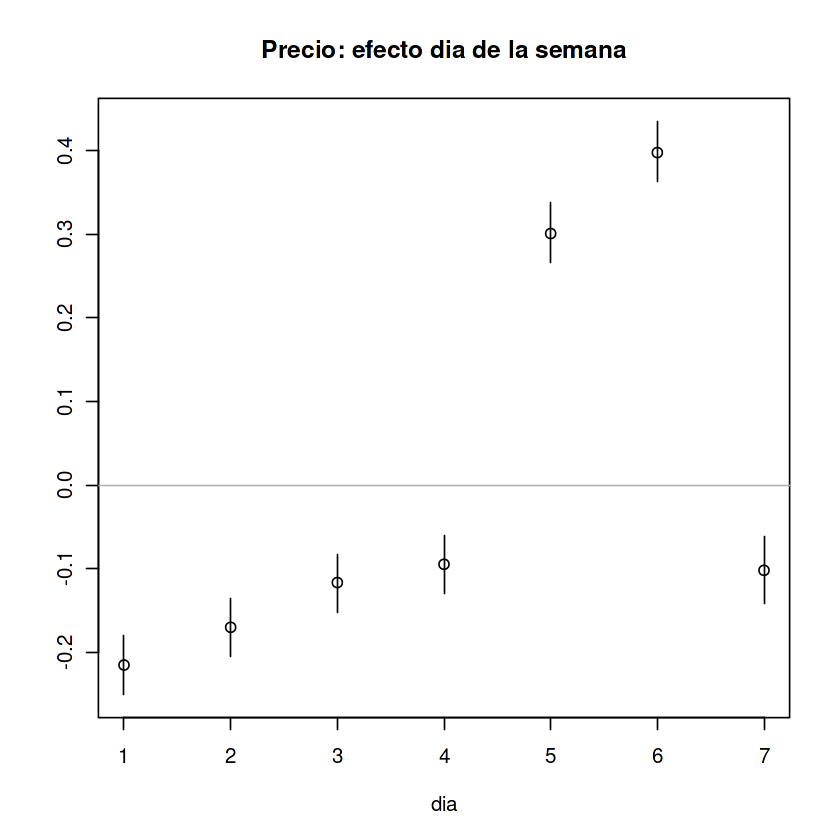

                      mean        2.5%       97.5%
epsilon.est[1]  0.14038224  0.11411986  0.16741436
epsilon.est[2] -0.05564405 -0.08010998 -0.03170182
epsilon.est[3] -0.08473820 -0.12504392 -0.04418354


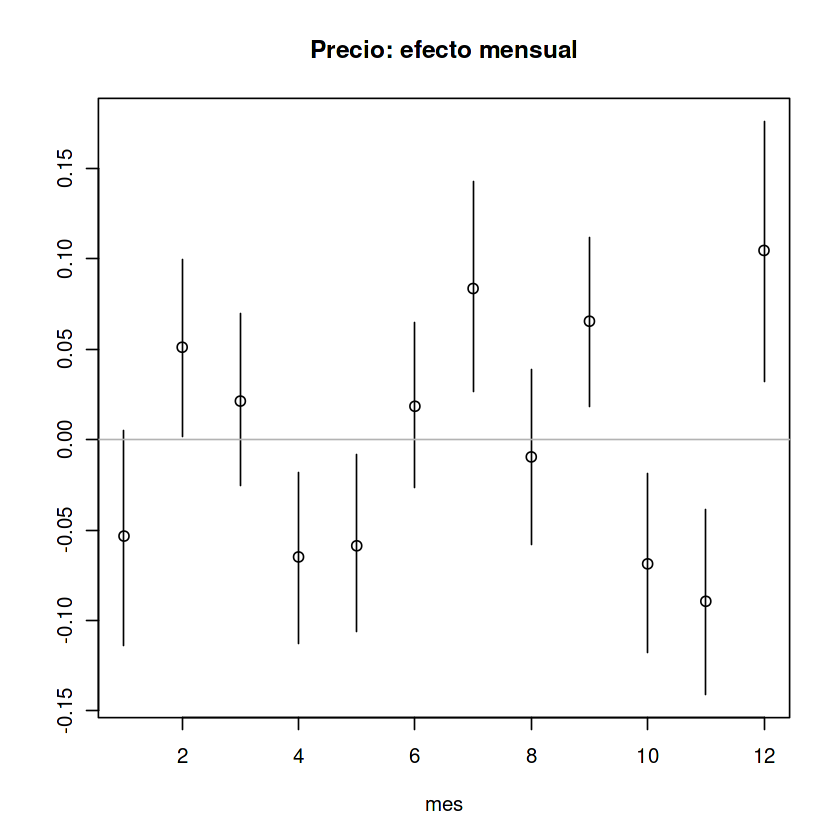

                   mean       2.5%      97.5%
theta.est[1] -0.2203439 -0.2588271 -0.1846384
theta.est[2]  0.2203439  0.1846384  0.2588271


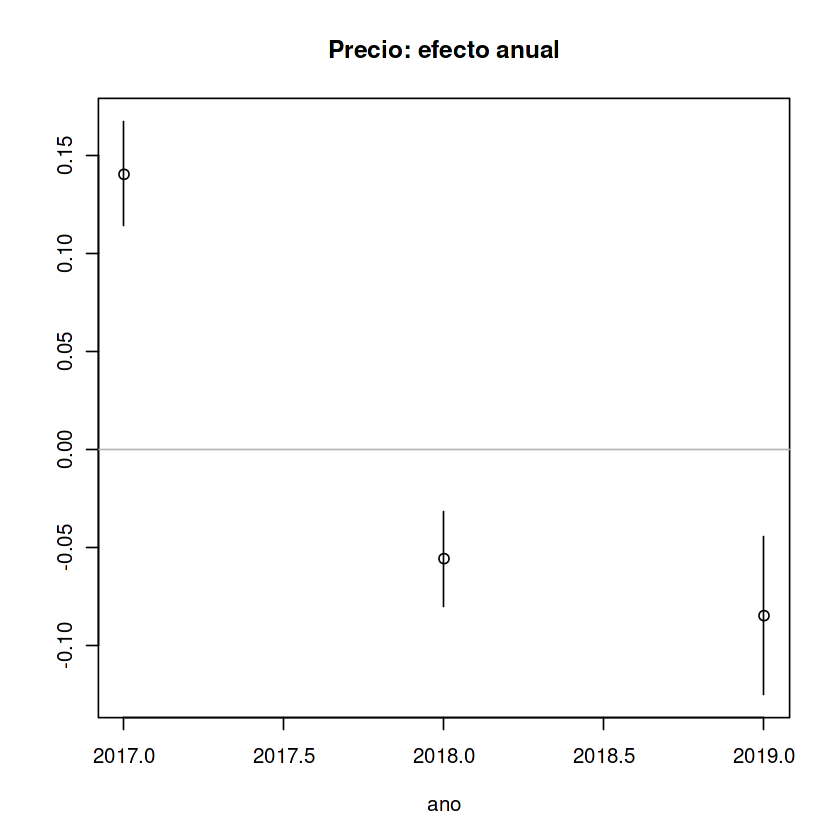

                mean         2.5%       97.5%
tau[1]    12.0640732 1.924656e+00  32.5233836
tau[2]   147.5113320 1.232582e+01 497.9600487
tau[3]     6.2809367 1.097197e+00  17.3160501
tau[4]     9.2466537 2.748852e+00  20.6382981
tau[5]     1.7956839 2.144533e-01   5.2948838
tau[6]    44.2367862 1.235945e+00 231.5957375
tau[7]     2.0112913 1.742000e-03  10.7035348
tau[8]     5.2114749 1.160946e+00  12.8308162
tau[9]     5.9212201 1.690850e+00  13.1317905
tau[10]    4.3906757 6.732108e-01  12.3457683
tau[11]   13.0115246 2.829321e+00  32.8586878
tau[12]   60.6440621 1.037157e+00 237.7030112
tau[13]   39.2447001 2.340644e+00 137.1479401
tau[14]   10.4688598 2.128347e+00  26.2304134
tau[15]    5.8000276 3.134991e-01  22.3783106
tau[16]   21.7050046 2.007815e+00  67.8396625
tau[17]   26.4276887 1.600180e+00  92.6702098
tau[18]   14.7628627 1.047670e+00  46.6034642
tau[19]    1.3248119 2.479477e-01   3.3233580
tau[20]    1.7282116 3.830885e-01   3.9331598
tau[21]   10.5855263 5.715580e-01 

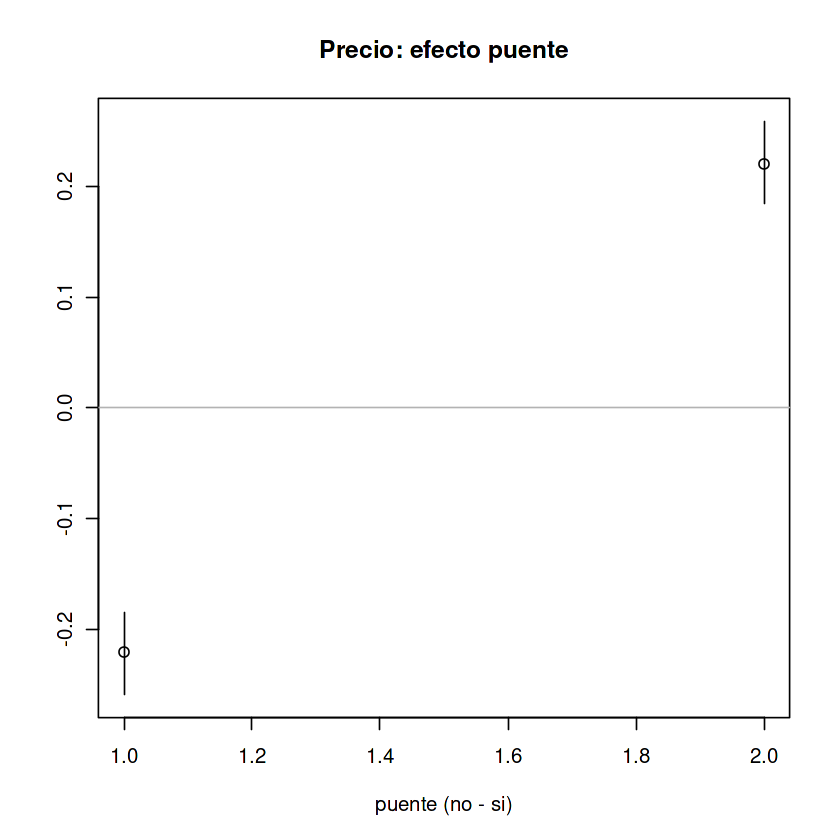

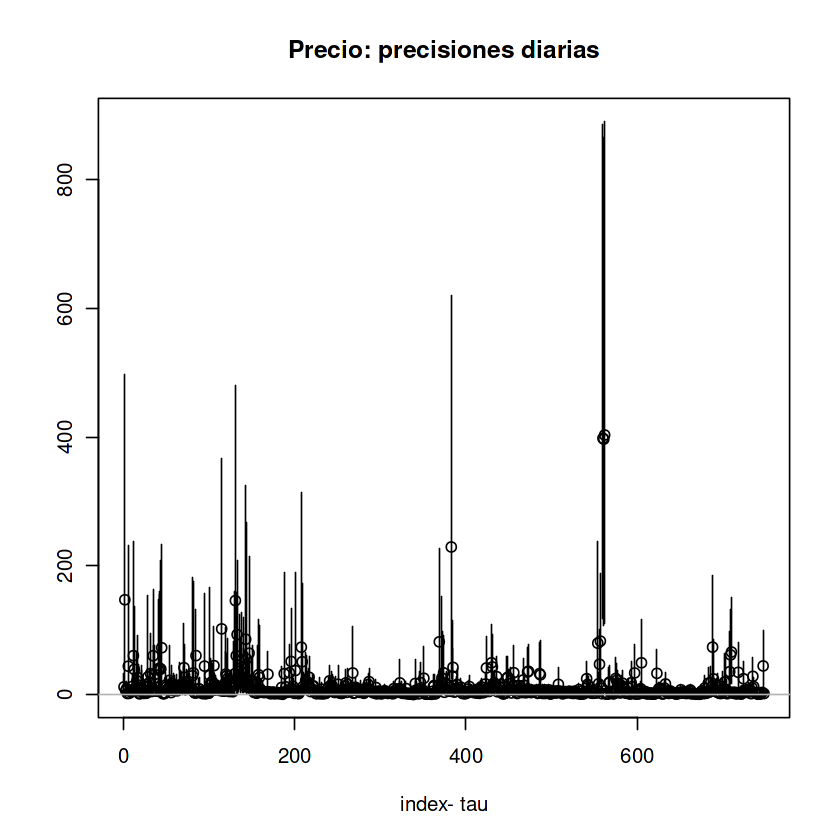

In [43]:
ejercicio35Graf(ej.sim)

# Checar modelos de tarea 2 y 3 y comentarlos